#  DEEPLEARNING IMAGES FUNCTIONAL EfficientNetB1

In [1]:
import glob
import pandas as pd
import tensorflow as tf


from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html
#get current working directory
path = os.getcwd() + '\\images\\image_train'
path

classes = {'10':' Livres, Couvertures de livres ','40':' Jeux videos, CDs + mais aussi equipements, cables, etc. ','50':' Jeux Vidéos, Equipements ','60':' Consoles, Manettes, croix, boutons, ecrans ','1140':' Figurines, Personnages et objets, parfois dans des boites ','1160':' Cartes, Rectangles, beaucoup de couleurs ','1180':' Figurines et boites ','1280':' Jouets, poupées nounours, equipements enfants','1281':' Jeux enfants, Boites et autres, couleurs flashy','1300':' Jeux techniques, Equipement, petites machines ','1301':' Habits bébés, petites photos ','1302':' Equipements, Habits, outils, jouets, objets sur fond blanc','1320':' Matériel et meubles bébé poussettes, habits','1560':' Meubles, matelas canapés lampes, chaises','1920':' Oreillers, coussins, draps','1940':' Alimentations, conserves boites d gateaux','2060':' Décorations','2220':' Equipements divers pour animaux','2280':' Livres et revues anciennes','2403':' Livres et revues de collection','2462':' Equipement jeux, play stations','2522':' Cahiers, carnets, marque pages','2582':' Matériel, meubles et outils pour le jardin','2583':' Equipements technique pour la maison et exterieur (piscines), produits','2585':' Idem 2583:  Equipements technique pour la maison et exterieur (piscines), produits','2705':' Livres','2905':' Jeux vidéos'}

model_type = 'Functional'
existing_model = 'EffNetB1'
version = 'v2'
filename = existing_model + '_' +  version
model_path = 'models_output\\' + existing_model + '\\' + version + '\\'

Nombre de mots par texte:

## IMAGES

Recuperer les données images:

In [2]:
X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0).squeeze().map(str)

#Create a column with the name of the picture
X['image_name'] = 'image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
X['image_path'] = path + r'\image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
print(X['image_name'].loc[0])
print(X['image_path'].loc[0])

image_1263597046_product_3804725264.jpg
C:\Users\Edgar\Documents\Rakuten\images\image_train\image_1263597046_product_3804725264.jpg


Concatener X_train et les labels:

In [3]:
X = pd.concat([X,y],axis=1)
X

,designation,description,productid,imageid,image_name,image_path,prdtypecode
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,image_1263597046_product_3804725264.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,10
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237,image_1008141237_product_436067568.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2280
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,image_938777978_product_201115110.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,50
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496,image_457047496_product_50418756.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,1280
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786,image_1077757786_product_278535884.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2705
...,...,...,...,...,...,...,...
84911,The Sims [ Import Anglais ],NaN,206719094,941495734,image_941495734_product_206719094.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,40
84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...,<b>Description complète :</b><br />Kit piscine...,3065095706,1188462883,image_1188462883_product_3065095706.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2583
84913,Journal Officiel De La Republique Francaise N°...,NaN,440707564,1009325617,image_1009325617_product_440707564.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,2280
84914,Table Basse Bois De Récupération Massif Base B...,<p>Cette table basse a un design unique et con...,3942400296,1267353403,image_1267353403_product_3942400296.jpg,C:\Users\Edgar\Documents\Rakuten\images\image_...,1560


Une fois nous avons un dataset de la taille desirée on peut le séparer en train et test sets:

In [26]:
X_train_img, X_test_img, y_train, y_test = train_test_split(X[['image_name','prdtypecode']], X.prdtypecode, test_size=0.2, random_state=42)
#X_train_path, X_test_path, y_train, y_test = train_test_split(X.image_path, X.label, random_state=42)

In [5]:
X_train_img

,image_name,prdtypecode
60735,image_1208783386_product_2825941333.jpg,1320
9118,image_856119038_product_89102802.jpg,1281
55855,image_936925976_product_197015072.jpg,2403
42138,image_1166755995_product_2824252365.jpg,1302
10948,image_1017775450_product_418466190.jpg,10
...,...,...
6265,image_938718607_product_183256510.jpg,1940
54886,image_1289079205_product_4086048240.jpg,2060
76820,image_1273354395_product_3992621069.jpg,1920
860,image_1323296971_product_4231695757.jpg,1302


Transformation des données:

In [6]:
#APPLY SOME TRANSFORMATIONS TO DATA
#from keras.applications.vgg16 import preprocess_input
from keras.applications.efficientnet import preprocess_input

batch = 32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(#rescale = 1./255,
                                preprocessing_function = preprocess_input,
                                   shear_range = 0.5,
                                   zoom_range = 0.1,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                    brightness_range = [0.9,1.1],
                                   fill_mode='nearest')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(#rescale = 1./255,
                                                              preprocessing_function = preprocess_input
                                                              )

train_set = train_datagen.flow_from_dataframe(dataframe=X_train_img,
                                              directory=path,
                                              x_col = "image_name",
                                              y_col = "prdtypecode",
                                              class_mode ="sparse",
                                              target_size = (224, 224),
                                              batch_size = batch)

test_set = test_datagen.flow_from_dataframe(dataframe=X_test_img,
                                              directory=path,
                                              x_col = "image_name",
                                              y_col = "prdtypecode",
                                            class_mode ="sparse",
                                              target_size = (224, 224),
                                              batch_size = batch,
                                           shuffle=False)

Found 67932 validated image filenames belonging to 27 classes.
Found 16984 validated image filenames belonging to 27 classes.


### MODELE POUR CLASSIFICATION D'IMAGE

In [7]:
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras import Model

base_model = tf.keras.applications.EfficientNetB1(weights='imagenet',input_shape=(224, 224, 3),include_top=False)

input_ = Input(shape=(224, 224, 3), name= 'input_' + filename)
x = base_model(input_)
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu',name= 'dense_' + filename)(x)
#x = BatchNormalization(trainable = True,axis=1,name= 'batchnorm' + model_name)(x)
x = Dropout(0.5,name= 'dropout_' + filename)(x)
x = Dense(512, activation='relu',name= 'dense_2_' + filename)(x)
x = Dropout(0.2,name= 'dropout_2_' + filename)(x)
#x = Flatten()(x) 
output = Dense(27, activation='softmax',name= 'output_' + filename)(x)

model = Model(input_, output)

In [8]:
unfreezed_layers = 15 #Nombre de couches a décongeler pour aplique le finetuning: Voir livre Deep Learning with python

# Freezer les couches du modele de base
for layer in base_model.layers: 
    layer.trainable = False

# DeFreezer les quelques couches du modele de base
for layer in base_model.layers[-unfreezed_layers:]:
    print(layer.name)
    layer.trainable = True

model.summary()

block7b_dwconv
block7b_bn
block7b_activation
block7b_se_squeeze
block7b_se_reshape
block7b_se_reduce
block7b_se_expand
block7b_se_excite
block7b_project_conv
block7b_project_bn
block7b_drop
block7b_add
top_conv
top_bn
top_activation
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_EffNetB1_v2 (InputLaye [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb1 (Functional)  (None, 7, 7, 1280)        6575239   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_EffNetB1_v2 (Dense)    (None, 1024)              1311744   
_________________________________________________________________
dropout_EffNetB1_v2 (Dropout (None, 1024)              0         
__________________________

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
#model.save(model_path + filename)

Callbacks:

In [11]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(monitor='val_accuracy',
                                         patience=3,
                                         mode='max',
                                         restore_best_weights=True)


checkpoint = callbacks.ModelCheckpoint(filepath= model_path + filename + '.hdf5', 
                                       monitor='val_accuracy',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='max',
                                       save_freq='epoch')

red_on_plateau = callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                             patience=2, 
                                             factor=0.1,
                                             verbose=1)

In [12]:
#model.fit_generator(gen, steps_per_epoch=int(len(y_train.values)/16), validation_data = gentest, validation_steps = int(len(y_test.values)/16),epochs=10, workers=-1,callbacks=[early_stopping, checkpoint])
#model.fit_generator(train_set, steps_per_epoch=int(len(y_train.values)/32), validation_data = test_set, validation_steps = int(len(y_test.values)/32),epochs=10, workers=1)

model.load_weights(model_path + filename + '.hdf5')
history = model.fit(train_set, steps_per_epoch=int(len(y_train.values)/batch), validation_data = test_set, validation_steps = int(len(y_test.values)/batch),epochs=30, workers=-1,callbacks=[early_stopping, checkpoint,red_on_plateau])

#https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/
#So, we have learned the difference between Keras.fit and Keras.fit_generator functions used to train a deep learning neural network
#.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
#.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

Epoch 1/30
2122/2122 [==============================] - 5697s 3s/step - loss: 0.5939 - accuracy: 0.8054 - val_loss: 1.4458 - val_accuracy: 0.6471


C:\Users\Edgar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
2122/2122 [==============================] - 5750s 3s/step - loss: 0.5725 - accuracy: 0.8118 - val_loss: 1.4455 - val_accuracy: 0.6481
Epoch 3/30
2122/2122 [==============================] - 5725s 3s/step - loss: 0.5467 - accuracy: 0.8218 - val_loss: 1.4758 - val_accuracy: 0.6492
Epoch 4/30
2122/2122 [==============================] - 5725s 3s/step - loss: 0.5258 - accuracy: 0.8267 - val_loss: 1.4735 - val_accuracy: 0.6498
Epoch 5/30
2122/2122 [==============================] - 5736s 3s/step - loss: 0.5020 - accuracy: 0.8335 - val_loss: 1.5170 - val_accuracy: 0.6504
Epoch 6/30
2122/2122 [==============================] - 5727s 3s/step - loss: 0.4905 - accuracy: 0.8389 - val_loss: 1.5371 - val_accuracy: 0.6510
Epoch 7/30
2122/2122 [==============================] - 5723s 3s/step - loss: 0.4667 - accuracy: 0.8448 - val_loss: 1.5797 - val_accuracy: 0.6500
Epoch 8/30
2122/2122 [==============================] - 5731s 3s/step - loss: 0.4515 - accuracy: 0.8507 - val_loss: 1.6215 -

In [13]:
model.save(model_path + filename)
saved_model = tf.keras.models.load_model(model_path + filename)
saved_model.load_weights(model_path + filename + '.hdf5')
saved_model.summary()

C:\Users\Edgar\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: models_output\EffNetB1\v2\EffNetB1_v2\assets


INFO:tensorflow:Assets written to: models_output\EffNetB1\v2\EffNetB1_v2\assets


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_EffNetB1_v2 (InputLaye [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb1 (Functional)  (None, 7, 7, 1280)        6575239   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_EffNetB1_v2 (Dense)    (None, 1024)              1311744   
_________________________________________________________________
dropout_EffNetB1_v2 (Dropout (None, 1024)              0         
_________________________________________________________________
dense_2_EffNetB1_v2 (Dense)  (None, 512)               524800    
_________________________________________________________________
dropout_2_EffNetB1_v2 (Dropo (None, 512)               0     

In [14]:
import inspect

#saved_model.__dict__

for layer in saved_model.layers:
    print(layer.name)
    
#layer.__dict__
#vars(layer)

input_EffNetB1_v2
efficientnetb1
global_average_pooling2d
dense_EffNetB1_v2
dropout_EffNetB1_v2
dense_2_EffNetB1_v2
dropout_2_EffNetB1_v2
output_EffNetB1_v2


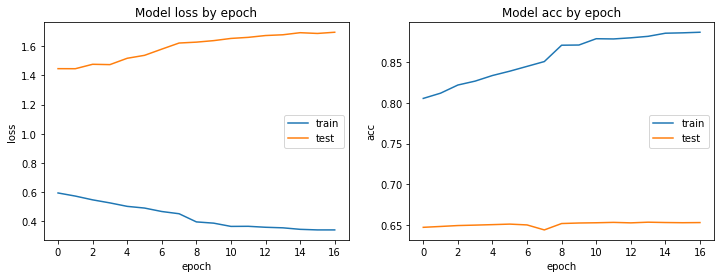

In [15]:
import matplotlib.pyplot as plt # Pour l'affichage d'images

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

## Matrice de confusion

In [16]:
model.load_weights(model_path + filename + '.hdf5')

In [17]:
y_pred_prob = model.predict(test_set)

In [18]:
fit_labels = dict((v,k) for k,v in (train_set.class_indices).items())

y_pred = [fit_labels[i] for i in np.argmax(y_pred_prob, axis=1)]

y_test_ = y_test.tolist()

In [19]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(y_test_,y_pred))

              precision    recall  f1-score   support

          10       0.54      0.65      0.59       612
        1140       0.65      0.63      0.64       539
        1160       0.91      0.93      0.92       786
        1180       0.58      0.42      0.48       146
        1280       0.43      0.43      0.43       961
        1281       0.32      0.23      0.27       424
        1300       0.68      0.74      0.71       974
        1301       0.73      0.69      0.71       169
        1302       0.53      0.52      0.52       507
        1320       0.53      0.48      0.51       672
        1560       0.64      0.60      0.62      1013
        1920       0.78      0.81      0.80       841
        1940       0.65      0.73      0.69       137
        2060       0.54      0.54      0.54      1029
        2220       0.52      0.34      0.41       170
        2280       0.70      0.73      0.72       942
        2403       0.71      0.64      0.67       986
        2462       0.66    

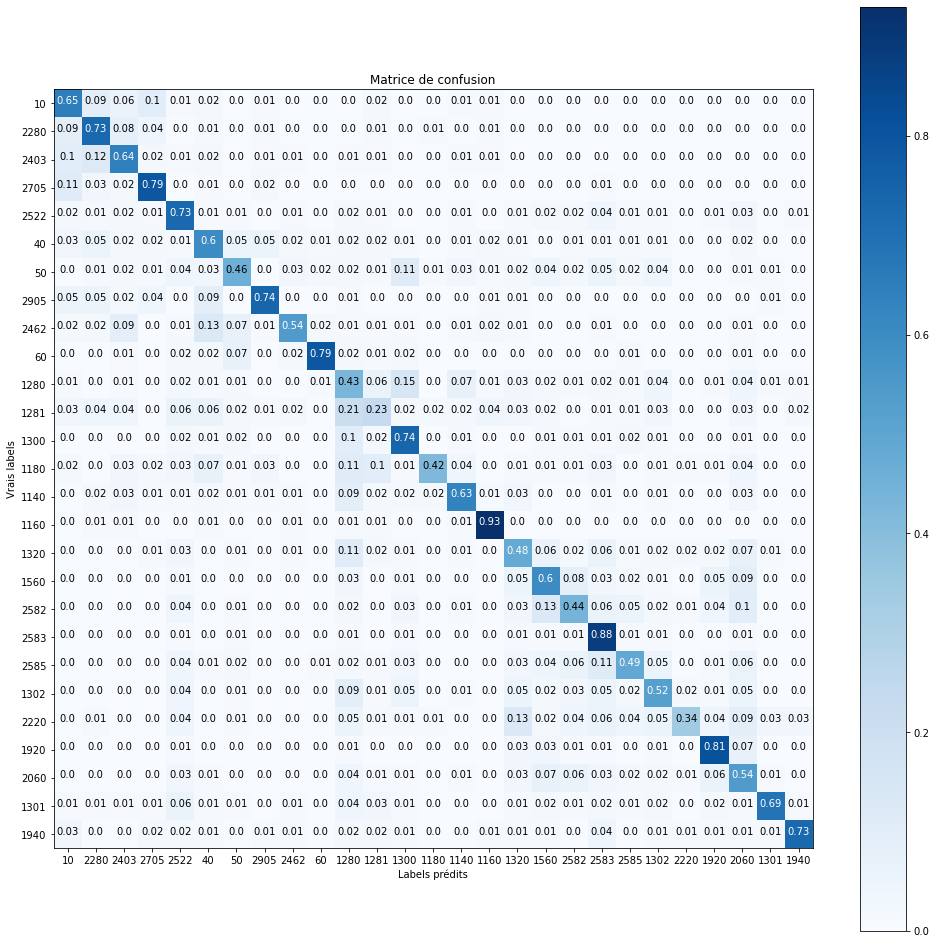

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline
import itertools # Pour créer des iterateurs

y_organised = ['10','2280','2403','2705','2522',
               '40','50','2905','2462','60',
               '1280','1281','1300','1180','1140','1160',
               '1320','1560',
               '2582','2583','2585','1302','2220',
               '1920','2060',
               '1301','1940'
              ]

def conf_matx(y_test,y_pred):
    #Réponse valable:
    #cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=list(set(y_pred)))
    cnf_matrix = metrics.confusion_matrix(y_test,y_pred,labels=y_organised)
    y_organised

    pond_matrix = []
    for line in cnf_matrix:
        pond_line = []
        for cell in line:
            pond_line.append(round(cell/sum(line),2))
        pond_matrix.append(pond_line)
        #print(sum(line))
        #print(sum(pond_line))
    cnf_matrix = np.array(pond_matrix)

    ###Optionnel: Afficher une matrice de confusion sous forme de tableau coloré
    #classes = set(y_pred)
    classes = y_organised

    plt.figure(figsize=(17,17))

    plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
    plt.title("Matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    #tick_marks = set(y_test)
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')
    plt.show()
    
conf_matx(y_test_,y_pred)

## Montrer erreurs

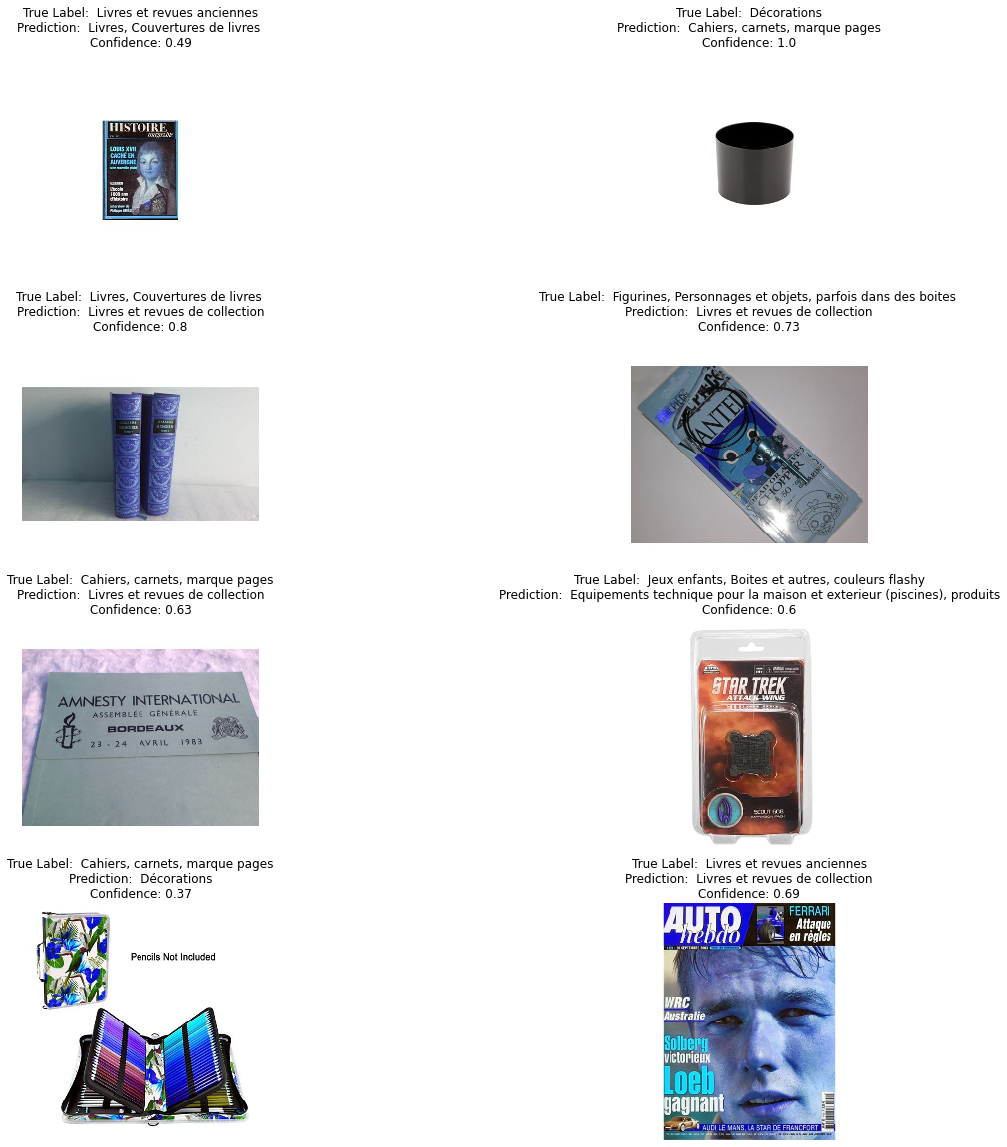

In [21]:
import cv2 #import OpenCV
import matplotlib.pyplot as plt # Pour l'affichage d'images
import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

error_indexes = []
for i in range(len(y_pred)):
    if (y_pred[i] != y_test[i]):
        error_indexes += [i]

images = 8
        
j = 1

plt.figure(figsize = (20,20))
#plt.subplot(10,5,1)
plt.axis('off')

for i in np.random.choice(error_indexes, size = images):
    img = cv2.imread(path + '\\' + X_test_img.iloc[i]['image_name'])
    img = cv2.resize(img, (240, 240), interpolation=cv2.INTER_CUBIC)
    #img = cv2.imread(path + '\\' + X_test_img.iloc[0]['image_name'], cv2.IMREAD_COLOR)
    #img = img.reshape(28, 28)
    
    #plt.figure(figsize=(5,10))
    
    plt.subplot(4,2,j)
    
    #plt.subplot(5, 5, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img, cmap=cm.binary, interpolation='None')
    plt.title('True Label: ' + classes[str(y_test[i])] \
              + '\n' + 'Prediction: '+ classes[str(y_pred[i])] \
              + '\n' + 'Confidence: '+ str(round(np.max(y_pred_prob, axis=1)[i],2)))

# Comparer

In [41]:
import pandas as pd
df_csv = pd.read_csv('predictions.csv',index_col=0)
df_csv

,real,RNN_v3,RNN_v4,EffNetB1_v2,RNN_v3 & EffNetB1_v2
0,10,NaN,NaN,NaN,NaN
1,2280,NaN,NaN,NaN,NaN
2,50,NaN,NaN,NaN,NaN
3,1280,NaN,NaN,NaN,NaN
4,2705,NaN,NaN,NaN,NaN
...,...,...,...,...,...
84911,40,NaN,NaN,NaN,NaN
84912,2583,NaN,NaN,NaN,NaN
84913,2280,NaN,NaN,NaN,NaN
84914,1560,NaN,NaN,NaN,NaN


In [42]:
df_csv['RNN_v3 & RNN_v4'] = df_csv.apply(lambda cell: int(cell['real']) if ((cell['RNN_v3'] == cell['real']) or (cell['RNN_v4'] == cell['real'])) else cell['RNN_v4'],axis=1)
df_csv

,real,RNN_v3,RNN_v4,EffNetB1_v2,RNN_v3 & EffNetB1_v2,RNN_v3 & RNN_v4
0,10,NaN,NaN,NaN,NaN,NaN
1,2280,NaN,NaN,NaN,NaN,NaN
2,50,NaN,NaN,NaN,NaN,NaN
3,1280,NaN,NaN,NaN,NaN,NaN
4,2705,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
84911,40,NaN,NaN,NaN,NaN,NaN
84912,2583,NaN,NaN,NaN,NaN,NaN
84913,2280,NaN,NaN,NaN,NaN,NaN
84914,1560,NaN,NaN,NaN,NaN,NaN


In [44]:
df_csv['RNN_v3 & RNN_v4 & EffNetB1_v2'] = df_csv.apply(lambda cell: int(cell['real']) if ((cell['RNN_v3 & RNN_v4'] == cell['real']) or (cell['EffNetB1_v2'] == cell['real'])) else cell['EffNetB1_v2'],axis=1)
df_csv

,real,RNN_v3,RNN_v4,EffNetB1_v2,RNN_v3 & EffNetB1_v2,RNN_v3 & RNN_v4,RNN_v3 & RNN_v4 & EffNetB1_v2
0,10,NaN,NaN,NaN,NaN,NaN,NaN
1,2280,NaN,NaN,NaN,NaN,NaN,NaN
2,50,NaN,NaN,NaN,NaN,NaN,NaN
3,1280,NaN,NaN,NaN,NaN,NaN,NaN
4,2705,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
84911,40,NaN,NaN,NaN,NaN,NaN,NaN
84912,2583,NaN,NaN,NaN,NaN,NaN,NaN
84913,2280,NaN,NaN,NaN,NaN,NaN,NaN
84914,1560,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_final = df_csv.dropna(subset=['RNN_v3'])
df_final

,real,RNN_v3,RNN_v4,EffNetB1_v2,RNN_v3 & EffNetB1_v2,RNN_v3 & RNN_v4,RNN_v3 & RNN_v4 & EffNetB1_v2
24,1300,1300.0,1280.0,1302.0,2583.0,1300.0,1300.0
34,40,10.0,1320.0,40.0,2462.0,1320.0,40.0
35,2060,1560.0,2060.0,1560.0,1280.0,2060.0,2060.0
39,2583,2583.0,2583.0,1300.0,1140.0,2583.0,2583.0
75,2280,10.0,40.0,2280.0,1320.0,40.0,2280.0
...,...,...,...,...,...,...,...
84896,10,10.0,10.0,10.0,2280.0,10.0,10.0
84900,10,10.0,10.0,10.0,1160.0,10.0,10.0
84909,2583,2583.0,2583.0,2583.0,1160.0,2583.0,2583.0
84910,2220,2220.0,2220.0,2220.0,10.0,2220.0,2220.0


In [46]:
from sklearn.metrics import f1_score, classification_report

print(classification_report(df_final['real'].map(int).to_list(),df_final['RNN_v3 & RNN_v4 & EffNetB1_v2'].map(int).to_list()))

              precision    recall  f1-score   support

          10       0.86      0.87      0.87       612
          40       0.91      0.89      0.90       521
          50       0.89      0.90      0.90       357
          60       0.94      0.96      0.95       161
        1140       0.88      0.91      0.89       539
        1160       0.97      0.99      0.98       786
        1180       0.88      0.73      0.80       146
        1280       0.85      0.84      0.85       961
        1281       0.84      0.73      0.78       424
        1300       0.94      0.98      0.96       974
        1301       0.96      0.95      0.96       169
        1302       0.89      0.87      0.88       507
        1320       0.90      0.84      0.87       672
        1560       0.92      0.91      0.91      1013
        1920       0.95      0.96      0.95       841
        1940       0.90      0.97      0.93       137
        2060       0.89      0.91      0.90      1029
        2220       0.91    

## Features extraction

In [22]:
from keras.models import Model

from sklearn.svm import SVC
intermediate_layer_model = Model(model.input, model.layers[2].output)

X_train_features = intermediate_layer_model.predict(train_set)


KeyboardInterrupt: 

In [ ]:
X_test_features = intermediate_layer_model.predict(test_set)

In [ ]:
svm = SVC(C=100)

svm.fit(X_train_features, data_train["class"])

In [ ]:
svm.score(X_test_features,data_test["class"])